In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Datascience_contest
# csv 파일 불러오기

/content/drive/MyDrive/Datascience_contest


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot
import warnings
warnings.filterwarnings("ignore")
# 필요한 라이브러리 import

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
exam = pd.read_csv('examSet.csv')
exam
new = exam.iloc[:,31: 61]
new = new.T
new
# 1번째 생산정부터 44번째 생산정까지 생산량 dataframe 생성.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
GAS_MONTH_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121689.0,7350.0,246111.0,51129.0,50826.0,43995.0,21039.0,6.0,99657.0,90525.0,82548.0,93117.0,34737.0,126957.0,99669.0,147357.0,15786.0,206499.0,146256.0,107421.0,183996.0,102384.0,28605.0,0.0,82164.0,88026.0,57012.0,24156.0,75966.0
GAS_MONTH_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,107529.0,0.0,0.0,0.0,0.0,23361.0,247065.0,151962.0,128622.0,149382.0,147762.0,106224.0,150156.0,223929.0,250092.0,198345.0,207615.0,221346.0,204015.0,188874.0,203235.0,153498.0,0.0,147960.0,124965.0,121395.0,97557.0,50277.0
GAS_MONTH_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,182391.0,0.0,0.0,33363.0,0.0,206907.0,129543.0,115455.0,110553.0,107490.0,155949.0,120177.0,226011.0,243417.0,205971.0,268698.0,214224.0,195801.0,227799.0,206946.0,71847.0,0.0,109713.0,80148.0,144666.0,80013.0,63174.0
GAS_MONTH_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79173.0,141591.0,115983.0,93615.0,137997.0,0.0,165075.0,137685.0,97170.0,104901.0,100284.0,127005.0,160371.0,157035.0,178293.0,241956.0,217683.0,254631.0,213348.0,195105.0,231015.0,123891.0,0.0,78528.0,53706.0,126840.0,0.0,74262.0
GAS_MONTH_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100230.0,126282.0,128781.0,100134.0,122979.0,123024.0,46497.0,2919.0,140550.0,87573.0,96168.0,92523.0,139134.0,148350.0,133788.0,155295.0,201543.0,234696.0,241512.0,208266.0,155697.0,226155.0,0.0,0.0,69372.0,54657.0,110202.0,72819.0,50544.0
GAS_MONTH_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134232.0,125841.0,131181.0,112389.0,79914.0,86697.0,42066.0,0.0,143049.0,82590.0,89160.0,85140.0,124866.0,137898.0,124851.0,135120.0,233187.0,208965.0,223845.0,230187.0,121695.0,224853.0,0.0,198291.0,60405.0,49131.0,94338.0,59793.0,39909.0
GAS_MONTH_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123477.0,125295.0,92907.0,83394.0,54195.0,58761.0,20295.0,54.0,133407.0,77259.0,71589.0,78147.0,119358.0,130122.0,114081.0,115458.0,201144.0,170103.0,260229.0,182403.0,97704.0,193863.0,196260.0,148545.0,54228.0,43311.0,87270.0,37698.0,31545.0
GAS_MONTH_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91434.0,108297.0,594939.0,73134.0,47811.0,57843.0,12429.0,222.0,128667.0,70509.0,70515.0,68925.0,108003.0,112587.0,102363.0,96615.0,163509.0,139845.0,278034.0,149502.0,71484.0,174246.0,154335.0,103149.0,50430.0,39897.0,79698.0,56340.0,22311.0
GAS_MONTH_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70785.0,85950.0,278697.0,55290.0,41019.0,44796.0,15591.0,0.0,117774.0,61314.0,64947.0,61722.0,94119.0,108387.0,97890.0,91302.0,141390.0,121527.0,242493.0,117744.0,54732.0,153309.0,108924.0,91587.0,42396.0,37269.0,80418.0,47007.0,18414.0
GAS_MONTH_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61569.0,79584.0,84624.0,45354.0,34344.0,42060.0,9399.0,0.0,112617.0,57045.0,60765.0,60222.0,85305.0,103542.0,93000.0,87486.0,121665.0,105600.0,212469.0,94170.0,52509.0,137682.0,97704.0,97290.0,42669.0,35967.0,71052.0,52791.0,21351.0


In [5]:
from datetime import date
from dateutil.rrule import rrule, MONTHLY
start_date = date(2018, 2, 1)
end_date = date(2020, 7, 31)
date_ = []

for date in rrule(MONTHLY, dtstart=start_date, until=end_date):
    print(date.strftime("%Y-%m-%d"))
    date_.append(date.strftime("%Y-%m-%d"))
# 시계열 예측 모델링을 위해선 시간을 나타내는 column이 필요하기 때문에 임의의 data column 생성(모든 생산정에 똑같이 사용)
# 정확한 날짜는 생산량을 예측하는데 중요하지 않다고 판단함.

2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01
2018-11-01
2018-12-01
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
2019-11-01
2019-12-01
2020-01-01
2020-02-01
2020-03-01
2020-04-01
2020-05-01
2020-06-01
2020-07-01


In [6]:
new['date'] = date_

col = new.columns[:-1]
col = col.insert(0, 'date')

new=new[col]
new
# data column을 생산량 dataframe과 합침.

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
GAS_MONTH_1,2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121689.0,7350.0,246111.0,51129.0,50826.0,43995.0,21039.0,6.0,99657.0,90525.0,82548.0,93117.0,34737.0,126957.0,99669.0,147357.0,15786.0,206499.0,146256.0,107421.0,183996.0,102384.0,28605.0,0.0,82164.0,88026.0,57012.0,24156.0,75966.0
GAS_MONTH_2,2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,107529.0,0.0,0.0,0.0,0.0,23361.0,247065.0,151962.0,128622.0,149382.0,147762.0,106224.0,150156.0,223929.0,250092.0,198345.0,207615.0,221346.0,204015.0,188874.0,203235.0,153498.0,0.0,147960.0,124965.0,121395.0,97557.0,50277.0
GAS_MONTH_3,2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,182391.0,0.0,0.0,33363.0,0.0,206907.0,129543.0,115455.0,110553.0,107490.0,155949.0,120177.0,226011.0,243417.0,205971.0,268698.0,214224.0,195801.0,227799.0,206946.0,71847.0,0.0,109713.0,80148.0,144666.0,80013.0,63174.0
GAS_MONTH_4,2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79173.0,141591.0,115983.0,93615.0,137997.0,0.0,165075.0,137685.0,97170.0,104901.0,100284.0,127005.0,160371.0,157035.0,178293.0,241956.0,217683.0,254631.0,213348.0,195105.0,231015.0,123891.0,0.0,78528.0,53706.0,126840.0,0.0,74262.0
GAS_MONTH_5,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100230.0,126282.0,128781.0,100134.0,122979.0,123024.0,46497.0,2919.0,140550.0,87573.0,96168.0,92523.0,139134.0,148350.0,133788.0,155295.0,201543.0,234696.0,241512.0,208266.0,155697.0,226155.0,0.0,0.0,69372.0,54657.0,110202.0,72819.0,50544.0
GAS_MONTH_6,2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134232.0,125841.0,131181.0,112389.0,79914.0,86697.0,42066.0,0.0,143049.0,82590.0,89160.0,85140.0,124866.0,137898.0,124851.0,135120.0,233187.0,208965.0,223845.0,230187.0,121695.0,224853.0,0.0,198291.0,60405.0,49131.0,94338.0,59793.0,39909.0
GAS_MONTH_7,2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123477.0,125295.0,92907.0,83394.0,54195.0,58761.0,20295.0,54.0,133407.0,77259.0,71589.0,78147.0,119358.0,130122.0,114081.0,115458.0,201144.0,170103.0,260229.0,182403.0,97704.0,193863.0,196260.0,148545.0,54228.0,43311.0,87270.0,37698.0,31545.0
GAS_MONTH_8,2018-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91434.0,108297.0,594939.0,73134.0,47811.0,57843.0,12429.0,222.0,128667.0,70509.0,70515.0,68925.0,108003.0,112587.0,102363.0,96615.0,163509.0,139845.0,278034.0,149502.0,71484.0,174246.0,154335.0,103149.0,50430.0,39897.0,79698.0,56340.0,22311.0
GAS_MONTH_9,2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70785.0,85950.0,278697.0,55290.0,41019.0,44796.0,15591.0,0.0,117774.0,61314.0,64947.0,61722.0,94119.0,108387.0,97890.0,91302.0,141390.0,121527.0,242493.0,117744.0,54732.0,153309.0,108924.0,91587.0,42396.0,37269.0,80418.0,47007.0,18414.0
GAS_MONTH_10,2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61569.0,79584.0,84624.0,45354.0,34344.0,42060.0,9399.0,0.0,112617.0,57045.0,60765.0,60222.0,85305.0,103542.0,93000.0,87486.0,121665.0,105600.0,212469.0,94170.0,52509.0,137682.0,97704.0,97290.0,42669.0,35967.0,71052.0,52791.0,21351.0


In [7]:
df = pd.DataFrame({'value':new[24].values}, index= new['date']) # 44개의 생산정의 시계열 예측을 한 번에 할 수 없어서 column을 하나씩 수정하며 값을 예측했습니다.
# new[15] ~ new[43]까지 시계열 모델링을 반복한 후 직접 엑셀 파일에 예측값을 작성했습니다.
df

,value
date,
2018-02-01,90525.0
2018-03-01,128622.0
2018-04-01,115455.0
2018-05-01,97170.0
2018-06-01,87573.0
2018-07-01,82590.0
2018-08-01,77259.0
2018-09-01,70509.0
2018-10-01,61314.0


In [8]:
# 데이터 전처리
df = df.dropna() #null 값 삭제
df = df[df['value'] > 1000] # value가 1000 이하인 값들은 모두 drop했습니다. 
df

,value
date,
2018-02-01,90525.0
2018-03-01,128622.0
2018-04-01,115455.0
2018-05-01,97170.0
2018-06-01,87573.0
2018-07-01,82590.0
2018-08-01,77259.0
2018-09-01,70509.0
2018-10-01,61314.0


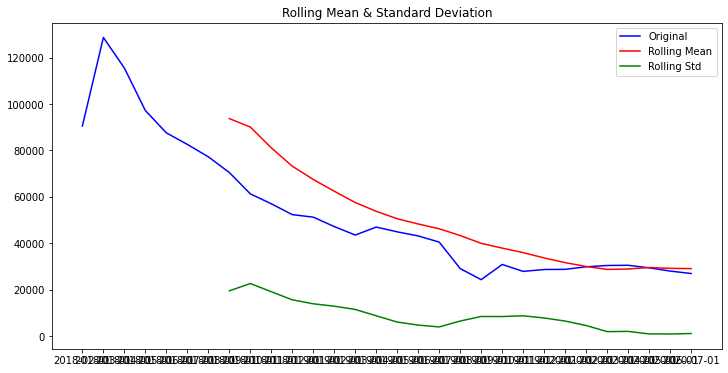


Results of Dickey-Fuller Test: 

Test Statistic                 -1.144052
p-value                         0.697189
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(ts):
            
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=8, center=False).mean()
    roll_std = ts.rolling(window=8, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(ts) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
result = stationarity_check(df['value'])

# n 번째 생산정의 데이터가 stationary한 지 아닌 지 테스트하기 위해 ADF Test를 진행했습니다.

In [18]:
#!pip install pmdarima
# auto_arima를 사용하기 위한 라이브러리 설치
from pmdarima.arima import auto_arima

model = auto_arima(df, start_p=0, start_q=0) # p=0, q=0부터 숫자를 늘려가며 AIC value가 가장 작은 parameter를 찾았습니다.
model.summary()

     |████████████████████████████████| 1.4 MB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 36.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -277.444
Date:                Mon, 27 Dec 2021   AIC                            566.889
Time:                        11:04:09   BIC                            575.092
Sample:                             0   HQIC                           569.458
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -441.0790    505.515     -0.873      0.383   -1431.871     549.713
ar.L1          0.8660      0.107      8.080      0.000       0.656       1.076
ar.L2         -0.1310      0.170     -0.770      0.441      -0.465       0.203
ma.L1         -0.2818      0.156     -1.804      0.071      -0.588       0.024
ma.L2         -0.5114      0.241     -2.126      0.034      -0.983      -0.040
sigma2      1.112e+07      0.022   5.08e+08      0.000    1.11e+07    1.11e+07
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.16
Prob(Q):                               nan   Prob(JB):                         0.56
Heteroskedasticity (H):               2.09   Skew:                            -0.48
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+25. Standard errors may be unstable.
"""

In [19]:
model = auto_arima(df, start_p=0, start_q=0)
print(model.seasonal_order) # auto_arima가 SARIMAX 모델을 선택하여 seasonal_order를 확인한 뒤 계절성의 여부를 확인했습니다.

(0, 0, 0, 0)


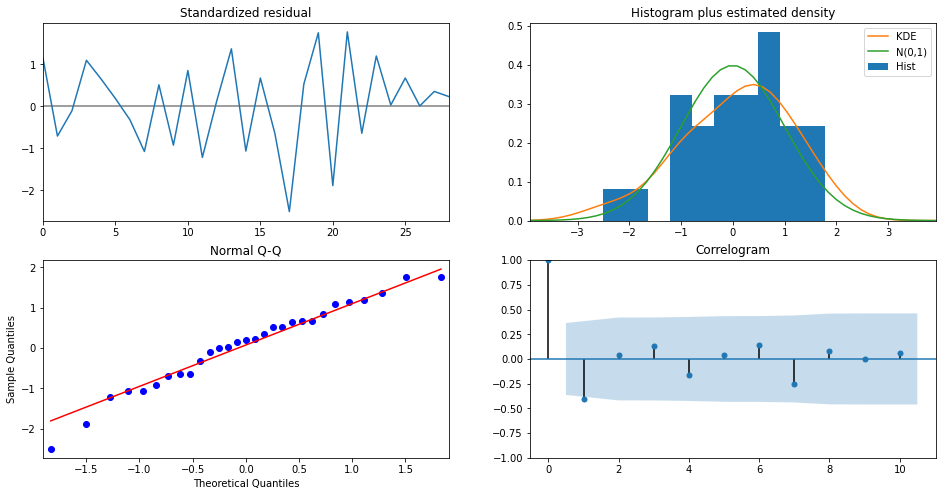

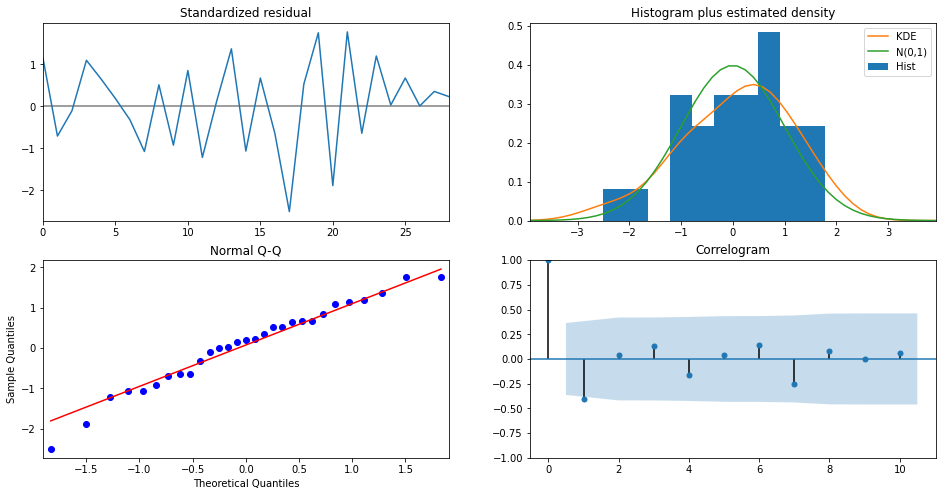

In [20]:
model.plot_diagnostics(figsize=(16,8)) # 잔차에 대한 진단

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_model = SARIMAX(df,
                     order=model.order,
                     seasonal_order=model.seasonal_order).fit()
display(best_model.summary())

# auto_arima가 SARIMAX를 선택하여 SARIMAX 모델링을 진행하였습니다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  value   No. Observations:                   30
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -278.405
Date:                Mon, 27 Dec 2021   AIC                            566.810
Time:                        11:11:08   BIC                            573.646
Sample:                    02-01-2018   HQIC                           568.951
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9400      0.114      8.226      0.000       0.716       1.164
ar.L2         -0.1029      0.123     -0.838      0.402      -0.344       0.138
ma.L1         -0.3897      0.446     -0.875      0.382      -1.263       0.484
ma.L2         -0.6103      0.159     -3.838      0.000      -0.922      -0.299
sigma2      1.286e+07   3.86e-08   3.33e+14      0.000    1.29e+07    1.29e+07
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.01
Prob(Q):                               nan   Prob(JB):                         0.60
Heteroskedasticity (H):               1.92   Skew:                            -0.44
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.13e+30. Standard errors may be unstable.
"""

In [35]:
def forecast_to_df(model, steps=6): # SARIMAX 모델과 적절한 parameter값을 통해 향후 6개월치 생산량을 예측했습니다.
    forecast = model.get_forecast(steps=steps)
    pred_df = forecast.conf_int()
    pred_df['pred'] = forecast.predicted_mean
    pred_df.columns = ['lower', 'upper', 'pred'] #pred column이 예측값입니다.
    return pred_df
print(forecast_to_df(best_model, steps=6)) # result of forecasting
np.mean(forecast_to_df(best_model, steps=6)['pred']) # 예측된 향후 6개월치 생산량의 평균값


                   lower         upper          pred
2020-08-01  20360.328457  34589.708605  27475.018531
2020-09-01  15742.807835  42278.494845  29010.651340
2020-10-01  13757.595732  47059.554221  30408.574977
2020-11-01  12841.359655  50287.637686  31564.498671
2020-12-01  12425.783007  52588.473350  32507.128178
2021-01-01  12263.432037  54284.927164  33274.179601


30706.675216247462